# SIR-Modell

## Parameter

- `a`: Die Übertragbarkeit des Virus. Hängt davon ab wie viele `Suseptible` und wie viele `Infected` es gibt.
- `b`: Die Rate wie schnell man nach einer Infektion zurück zu den `Suseptible` geht. Das Individuum hat also durch die Infektion keine Immunität erhalten. Hängt davon ab wie viele `Infected` es gibt. Reduziert die Anzahl `Infected`.
- `c`: Die Rate mit der infizierte Individuun *heilen*, also sich immunisieren. Hängt von `Infected` ab. Reduziiert die Anzahl `Infected`.
- `d`: Die Rate mit der geimpft wird. Hängt nur von `Suseptible` ab. Reduziert `Suseptible` und erhöht `Vaccinated`.
- `e`: Die Rate mit der immunisierte (`Removed`) die Immunität verlieren. Hängt von `Removed` ab. Erhöht `Suseptible`.
- `f`: Die Rate mit der geimpfte Individuuen den Impfschutz verlieren. Hängt von `Vaccinated` ab und erhöht `Suseptible`.
- `k`: Todesrate bei Infizierten. Hängt von `Infected` ab und erhöht `Dead`.

## Events

Mit dem Objekt `events` kann das geschehen der Pandemie kontinuierlich verändert werden. Es kann für jeden Zeitschritt `t` ein Event angegeben werden. Bei einem Event werden die Parameter der laufenden Pandemie neu gesetzt.

**Beispiel:**
Zum Zeitpunkt `t=50` werden Massnahmen umgesetzt, welche die Verbreitung des Virus erschweren.

```python
events[50] = {'a': 0.0005}
```

In [21]:
from lib.iteration import *
import ipywidgets as widgets

a = widgets.FloatSlider(0.0001, description='a:', step=0.0001, min=0.0, max=0.001, readout_format='.4f')
b = widgets.FloatSlider(0.0, description='b:', step=0.01, min=0.0, max=0.5, readout_format='.1f')
c = widgets.FloatSlider(0.001, description='c:', step=0.001, min=0.0, max=0.1, readout_format='.2f')
d = widgets.FloatSlider(0.0, description='d:', step=0.001, min=0.0, max=0.01, readout_format='.3f')
e = widgets.FloatSlider(0.0, description='e:', step=0.01, min=0.0, max=0.1, readout_format='.2f')
f = widgets.FloatSlider(0.0, description='f:', step=0.01, min=0.0, max=0.1, readout_format='.2f')

s_start = widgets.IntSlider(990, description='S:', step=10, min=0, max=10000)
i_start = widgets.IntSlider(10, description='I:', step=10, min=0, max=10000)

days = widgets.IntSlider(365, description='Anzahl Tage', min=14, max=730)

daily_fluctuations = widgets.FloatSlider(0.0, description='Tägliche Unsicherheit', min=0.0, max=1.0)

display(a, b, c, d, e, f, s_start, i_start, days, daily_fluctuations)

highlight = {'Infected': {
        'color': 'red',
        'linewidth': 3,
        'linestyle': '-.'
    },'Suseptible': {
        'color': 'green'
    }, 'Dead': {
        'color': 'black'
}}

FloatSlider(value=0.0001, description='a:', max=0.001, readout_format='.4f', step=0.0001)

FloatSlider(value=0.0, description='b:', max=0.5, readout_format='.1f', step=0.01)

FloatSlider(value=0.001, description='c:', max=0.1, step=0.001)

FloatSlider(value=0.0, description='d:', max=0.01, readout_format='.3f', step=0.001)

FloatSlider(value=0.0, description='e:', max=0.1, step=0.01)

FloatSlider(value=0.0, description='f:', max=0.1, step=0.01)

IntSlider(value=990, description='S:', max=10000, step=10)

IntSlider(value=10, description='I:', max=10000, step=10)

IntSlider(value=365, description='Anzahl Tage', max=730, min=14)

FloatSlider(value=0.0, description='Tägliche Unsicherheit', max=1.0)

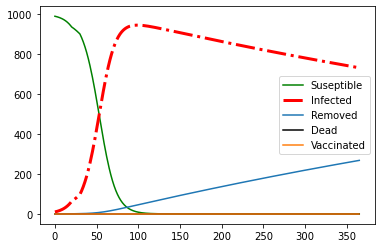

Tote: 0.0


In [22]:
events = {
    20: {'a': 0.00005}, # Massnahmen zur Ansteckungsvermeidung wurden umgesetzt.
    30: {'a': 0.0001}, # Das Virus wird ansteckender!!!
    
}

l = iteration(sir_modell, x0=[s_start.value, i_start.value, 0, 0, 0],
              n=days.value, a=a.value, b=b.value, c=c.value, d=d.value,
              e=e.value, f=f.value,
              daily_fluctuations=daily_fluctuations.value,
              events=events)

plot_iteration(l, highlight=highlight)

print(f'Tote: {l[3][-1]}')